# The Battle of Neighborhoods
## Week 4 assignment

### <Introduction / Business Problem>

In this project, I would like to explore similarity between San Francisco and Los Angeles based on the categories of restaurants and the location.

San Francisco and Los Angeles are populous and multi-cultural cities in California. By looking into the categories of the stores and where they are located, we can visualize the similarity between the two cities. 

### < Data and Results >
- Data: venues in San Francisco and Los Angeles, acquired from foursquare
- I focused on seven food categories: American, Mexican, Italian, Korean, Japanese, Thai, Chinese.
- More analysis on the reuslts will be coming later (next week assignment)
- Here, I show partial results of the data analysis 

Import Libraries

In [13]:
import pandas as pd
import numpy as np
import folium
import requests

# !pip install geopy
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize

Foursquare credentials

In [37]:
CLIENT_ID = 'OHRQ4AIDL5RU4SANERINI5MQ4GP1YQRYUVJKTE3ZCKHRTVER' # your Foursquare ID
CLIENT_SECRET = '2EPGFYHO1SWGU2OXHXQWHLBU0VZDCXEH0T3VOF2JQGV4OQFT' # your Foursquare Secret
ACCESS_TOKEN = 'ZTKXSBLOWL40U4DGK4OKLQX0N0ZNXRV200F12NPPWR2LGZT3' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OHRQ4AIDL5RU4SANERINI5MQ4GP1YQRYUVJKTE3ZCKHRTVER
CLIENT_SECRET:2EPGFYHO1SWGU2OXHXQWHLBU0VZDCXEH0T3VOF2JQGV4OQFT


### I will explore venues in San Francisco and Los Angeles area. 
- For each area, I will pull the data from foursquare. It collects venues from the city center within 20 km region. 
- Search keyowrd: food
- I filtered out rows that does not contain 'restaurant' in the category name. This is because sometimes elementary school is included in the search result.

### Let's beign with San Francisco.
## San Francisco

In [17]:
address = 'San Francisco, CA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

37.7790262 -122.4199061


In [31]:
search_query = 'food'
radius = 20000 # search radius: 20 km

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=OHRQ4AIDL5RU4SANERINI5MQ4GP1YQRYUVJKTE3ZCKHRTVER&client_secret=2EPGFYHO1SWGU2OXHXQWHLBU0VZDCXEH0T3VOF2JQGV4OQFT&ll=37.7790262,-122.4199061&oauth_token=ZTKXSBLOWL40U4DGK4OKLQX0N0ZNXRV200F12NPPWR2LGZT3&v=20180604&query=food&radius=20000&limit=300'

In [32]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6064db9104959b5a1fa095bb'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '49f356f8f964a5208a6a1fe3',
    'name': "Brenda's French Soul Food",
    'location': {'address': '652 Polk St',
     'crossStreet': 'btwn Eddy & Turk St',
     'lat': 37.782896409128426,
     'lng': -122.41889744997026,
     'labeledLatLngs': [{'label': 'display',
       'lat': 37.782896409128426,
       'lng': -122.41889744997026},
      {'label': 'entrance', 'lat': 37.782891, 'lng': -122.419019}],
     'distance': 439,
     'postalCode': '94102',
     'cc': 'US',
     'city': 'San Francisco',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['652 Polk St (btwn Eddy & Turk St)',
      'San Francisco, CA 94102']},
    'categories': [{'id': '4bf58dd8d48988d14f941735',
      'name': 'Southern / Soul Food Restaurant',
      'pluralName': 'Southern / Soul Food Restaurants',
      'shortNam

In [35]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.shape

C:\Users\Cho\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


(50, 25)

Search query 'food' does not seem to provide enough information to determine which area is which culture dominant. Let's specify the query and get the results again.

In [50]:
# Define a function to get the data from foursquare

def search_venues(search_query):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()

    venues = results['response']['venues']

    df = json_normalize(venues)
    
    return df

In [65]:
df_american = search_venues('american food')
df_mexican = search_venues('mexican food')
df_italian = search_venues('italian food')
df_korean = search_venues('korean food')
df_thai = search_venues('thai food')
df_japanese = search_venues('japanese food')
df_chinese = search_venues('chinese food')

# Concatenate the dataframe
df_SF = pd.concat([df_american, df_mexican, df_italian, df_korean, df_thai, df_japanese, df_chinese])
df_SF.shape

C:\Users\Cho\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


(350, 25)

Displace df_SF up to five rows, as an example

In [66]:
df_SF.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.neighborhood,venuePage.id
0,463bfdccf964a52026461fe3,Asian American Food Company,"[{'id': '4bf58dd8d48988d108941735', 'name': 'D...",v-1617231693,False,1426 Noriega St,btw 21st Ave & 22nd Ave,37.754349,-122.479118,"[{'label': 'display', 'lat': 37.75434875488281...",...,United States,"[1426 Noriega St (btw 21st Ave & 22nd Ave), Sa...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4c7bf78fbd346dcb4bc8fcef,Wok In Chinese American Food,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1617231693,False,50 Mendell St,NaN,37.743751,-122.384109,"[{'label': 'display', 'lat': 37.743751, 'lng':...",...,United States,"[50 Mendell St, San Francisco, CA 94124]",1188542,https://www.grubhub.com/restaurant/wok-in-chin...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
2,4b71cf11f964a520a55d2de3,Allstar Chinese Food & American Food,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1617231693,False,898 W Grand Ave,NaN,37.814504,-122.278235,"[{'label': 'display', 'lat': 37.81450363189941...",...,United States,"[898 W Grand Ave, Oakland, CA 94607]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4d33d2762e56236aefa329b4,SMN PLACE(House Of Great American Food and Vid...,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",v-1617231693,False,1533 Lincoln Ave,NaN,37.774639,-122.259236,"[{'label': 'display', 'lat': 37.774639, 'lng':...",...,United States,"[1533 Lincoln Ave, Alameda, CA 94501]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4abb9937f964a520128420e3,Chinese American International School,"[{'id': '4f4533804b9074f6e4fb0105', 'name': 'E...",v-1617231693,False,150 Oak St,NaN,37.775275,-122.422111,"[{'label': 'display', 'lat': 37.7752754784242,...",...,United States,"[150 Oak St, San Francisco, CA 94102]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in df_SF.columns if col.startswith('location.')] + ['id']
df_SF_filtered = df_SF.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_SF_filtered['categories'] = df_SF_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_SF_filtered.columns = [column.split('.')[-1] for column in df_SF_filtered.columns]

# limit the list only to where the city is San Francisco
df_SF_filtered = df_SF_filtered.loc[df_SF_filtered['city']=='San Francisco']
df_SF_filtered = df_SF_filtered[df_SF_filtered.categories.str.contains('Restaurant', na=False)]

df_SF_filtered.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Asian American Food Company,Dumpling Restaurant,1426 Noriega St,btw 21st Ave & 22nd Ave,37.754349,-122.479118,"[{'label': 'display', 'lat': 37.75434875488281...",5890,94122,US,San Francisco,CA,United States,"[1426 Noriega St (btw 21st Ave & 22nd Ave), Sa...",NaN,463bfdccf964a52026461fe3
1,Wok In Chinese American Food,Chinese Restaurant,50 Mendell St,NaN,37.743751,-122.384109,"[{'label': 'display', 'lat': 37.743751, 'lng':...",5034,94124,US,San Francisco,CA,United States,"[50 Mendell St, San Francisco, CA 94124]",NaN,4c7bf78fbd346dcb4bc8fcef
16,Brenda's French Soul Food,Southern / Soul Food Restaurant,652 Polk St,btwn Eddy & Turk St,37.782896,-122.418897,"[{'label': 'display', 'lat': 37.78289640912842...",439,94102,US,San Francisco,CA,United States,"[652 Polk St (btwn Eddy & Turk St), San Franci...",NaN,49f356f8f964a5208a6a1fe3
29,The American Grilled Cheese Kitchen,American Restaurant,799 Battery St,NaN,37.798365,-122.401257,"[{'label': 'display', 'lat': 37.79836546649156...",2706,94111,US,San Francisco,CA,United States,"[799 Battery St, San Francisco, CA 94111]",NaN,5696dadc498e77af2f0593b1
39,Aria Korean-American Snack Bar,Korean Restaurant,932 Larkin St,btwn Geary & Post,37.786554,-122.418066,"[{'label': 'display', 'lat': 37.786554, 'lng':...",853,94109,US,San Francisco,CA,United States,"[932 Larkin St (btwn Geary & Post), San Franci...",NaN,4fd3d6a5e4b0da81476a4ea6


In [101]:
def venues_pin(venues_map, dataframe, color):
    for lat, lng, label in zip(dataframe.lat, dataframe.lng, dataframe.categories):
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color=color,
            popup=label,
            fill = True,
            fill_color=color,
            fill_opacity=0.6
        ).add_to(venues_map)
    
    return venues_map

In [107]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=12) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='San Francisco',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)


# add the Italian restaurants as blue circle markers
df_SF_american = df_SF_filtered[df_SF_filtered.categories.str.contains('American', na=False)]
venues_pin(venues_map, df_SF_american, 'black')
print("American foods :", df_SF_american.shape[0])

df_SF_mexican = df_SF_filtered[df_SF_filtered.categories.str.contains('Mexican', na=False)]
venues_pin(venues_map, df_SF_mexican, 'orange')
print("Mexican foods :", df_SF_mexican.shape[0])

df_SF_italian = df_SF_filtered[df_SF_filtered.categories.str.contains('Italian', na=False)]
venues_pin(venues_map, df_SF_italian, 'yellow')
print("Italian foods :", df_SF_italian.shape[0])

df_SF_korean = df_SF_filtered[df_SF_filtered.categories.str.contains('Korean', na=False)]
venues_pin(venues_map, df_SF_korean, 'green')
print("Korean foods :", df_SF_korean.shape[0])

df_SF_thai = df_SF_filtered[df_SF_filtered.categories.str.contains('Thai', na=False)]
venues_pin(venues_map, df_SF_thai, 'blue')
print("Thai foods :", df_SF_thai.shape[0])

df_SF_japanese = df_SF_filtered[df_SF_filtered.categories.str.contains('Japanese', na=False)]
venues_pin(venues_map, df_SF_italian, 'navy')
print("Japanese foods :", df_SF_japanese.shape[0])

df_SF_chinese = df_SF_filtered[df_SF_filtered.categories.str.contains('Chinese', na=False)]
venues_pin(venues_map, df_SF_chinese, 'purple')
print("Chinese foods :", df_SF_chinese.shape[0])

# display map
venues_map

American foods : 1
Mexican foods : 12
Italian foods : 5
Korean foods : 8
Thai foods : 28
Japanese foods : 4
Chinese foods : 12


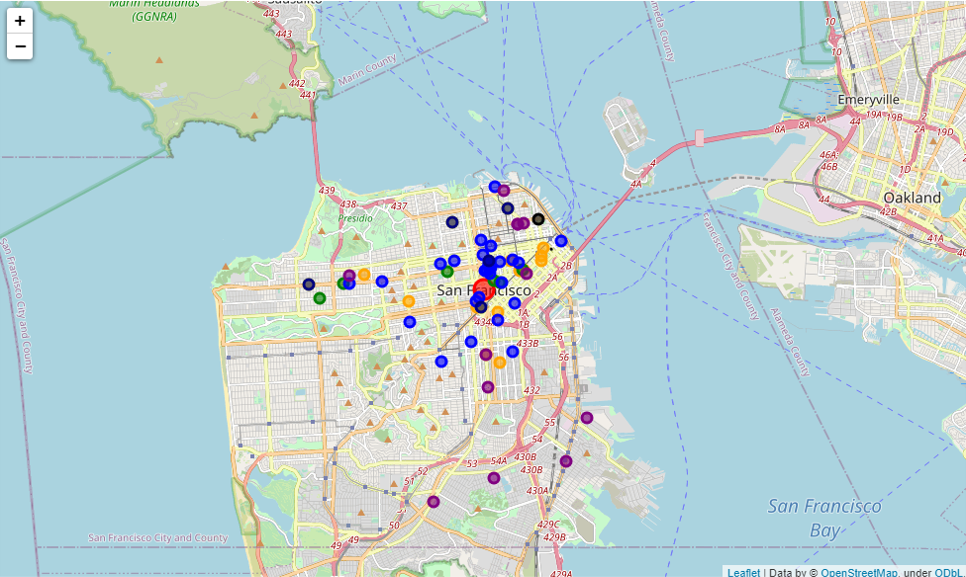

In [110]:
# In case the map is not displyed on Github
from IPython.display import Image
Image("SF_map.png")

In [109]:
# Create a dataframe.
numbers = {'Categories': ['American', 'Mexican', 'Italian', 'Korean', 'Thai', 'Japanese', 'Chinese'],
     'Number of Restaurants': [df_SF_american.shape[0], df_SF_mexican.shape[0], df_SF_italian.shape[0], df_SF_korean.shape[0], df_SF_thai.shape[0], df_SF_japanese.shape[0], df_SF_chinese.shape[0]]}
df_SF_stat = pd.DataFrame(data=numbers)
df_SF_stat

,Categories,Number of Restaurants
0,American,1
1,Mexican,12
2,Italian,5
3,Korean,8
4,Thai,28
5,Japanese,4
6,Chinese,12


### Now let's repeat the same analysis for Los Angeles area.

In [132]:
address = 'Los Angeles, CA'

geolocator = Nominatim(user_agent="foursquare_agent")
location_LA = geolocator.geocode(address)
latitude = location_LA.latitude
longitude = location_LA.longitude
print(latitude, longitude)

34.0536909 -118.242766


### Search query : food
Pull the data from foursquare

In [116]:
search_query = 'food'
radius = 20000 # search radius: 20 km

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_LA, longitude_LA,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60650e5117146414ee8d7081'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '5769d679498e9db0d75fc0d2',
    'name': 'Just Food For Dogs (DTLA)',
    'location': {'address': '333 S Spring St',
     'lat': 34.049549,
     'lng': -118.247109,
     'labeledLatLngs': [{'label': 'display',
       'lat': 34.049549,
       'lng': -118.247109}],
     'distance': 610,
     'postalCode': '90013',
     'cc': 'US',
     'city': 'Los Angeles',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['333 S Spring St', 'Los Angeles, CA 90013']},
    'categories': [{'id': '4bf58dd8d48988d100951735',
      'name': 'Pet Store',
      'pluralName': 'Pet Stores',
      'shortName': 'Pet Store',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/pet_store_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1617235537',
    'hasPerk': False},
   

### Search for American, Mexican, Italian, Korean, Thai, Japanese, Chiese food 

In [133]:
df_americanLA = search_venues('american food')
df_mexicanLA = search_venues('mexican food')
df_italianLA = search_venues('italian food')
df_koreanLA = search_venues('korean food')
df_thaiLA = search_venues('thai food')
df_japaneseLA = search_venues('japanese food')
df_chineseLA = search_venues('chinese food')

# Concatenate the dataframe
df_LA = pd.concat([df_americanLA, df_mexicanLA, df_italianLA, df_koreanLA, df_thaiLA, df_japaneseLA, df_chineseLA])
df_LA.shape

C:\Users\Cho\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


(350, 25)

In [134]:
df_LA.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,...,location.formattedAddress,venuePage.id,location.crossStreet,location.neighborhood,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name
0,5e6e5aad5bdafd0007c47818,American Food Tech Group,"[{'id': '5453de49498eade8af355881', 'name': 'B...",v-1617235974,False,4529 San Fernando Rd,34.134882,-118.263854,"[{'label': 'display', 'lat': 34.1348818, 'lng'...",9244,...,"[4529 San Fernando Rd, Glendale, CA 91204]",577396237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4bb79a57314e9521f262479d,Antojitos Lizeth Mexican & American Food,"[{'id': '4bf58dd8d48988d153941735', 'name': 'B...",v-1617235974,False,3325 W 6th St,34.063831,-118.294998,"[{'label': 'display', 'lat': 34.0638313293457,...",4947,...,"[3325 W 6th St, Los Angeles, CA 90020]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4f3235cc19836c91c7c102c5,American Food Courts,"[{'id': '4d4b7105d754a06374d81259', 'name': 'F...",v-1617235974,False,11726 San Vicente Blvd,34.053040,-118.466431,"[{'label': 'display', 'lat': 34.05303955078125...",20628,...,"[11726 San Vicente Blvd, Los Angeles, CA 90049]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4c9f8bab8afca093771b0b16,T & A Mexican and American Food,[],v-1617235974,False,NaN,33.962514,-118.175238,"[{'label': 'display', 'lat': 33.96251359978100...",11909,...,"[Bell, CA 90201]",NaN,Clara St & Wilcox Ave,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4f6ec858e4b0e0075bdc671f,Lucy's Mexican American Food,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",v-1617235974,False,NaN,33.936687,-118.213791,"[{'label': 'display', 'lat': 33.93668746948242...",13296,...,"[Lynwood, CA 90262]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in df_LA.columns if col.startswith('location.')] + ['id']
df_LA_filtered = df_LA.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_LA_filtered['categories'] = df_LA_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_LA_filtered.columns = [column.split('.')[-1] for column in df_LA_filtered.columns]

# limit the list only to where the city is Los Angeles
df_LA_filtered = df_LA_filtered.loc[df_LA_filtered['city']=='Los Angeles']
df_LA_filtered = df_LA_filtered[df_LA_filtered.categories.str.contains('Restaurant', na=False)]

df_LA_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
18,Kabab and More Middle Eastern Food,Middle Eastern Restaurant,663 S Hill St Ste M105,34.050782,-118.249187,"[{'label': 'display', 'lat': 34.05078188311793...",674,90014,US,Los Angeles,CA,United States,"[663 S Hill St Ste M105 (7th Street), Los Ange...",7th Street,NaN,4b4a52bcf964a520d98326e3
29,AB Chinese Fast Food,Chinese Restaurant,100 W 7th St,34.043961,-118.251701,"[{'label': 'display', 'lat': 34.04396057128906...",1361,90014,US,Los Angeles,CA,United States,"[100 W 7th St (Main), Los Angeles, CA 90014]",Main,NaN,4b6f8b38f964a52012f52ce3
49,Canton Food Co,Asian Restaurant,750 S Alameda St,34.031433,-118.238020,"[{'label': 'display', 'lat': 34.03143315933899...",2516,90021,US,Los Angeles,CA,United States,"[750 S Alameda St (Bay St), Los Angeles, CA 90...",Bay St,NaN,4b9c1ce4f964a520654b36e3
0,Al & Bea's Mexican Food,Mexican Restaurant,2025 E 1st St,34.026708,-118.219070,"[{'label': 'display', 'lat': 34.02670819607481...",3714,90033,US,Los Angeles,CA,United States,"[2025 E 1st St (at N St Louis St), Los Angeles...",at N St Louis St,NaN,4bba5efd1261d13a428dea98
1,Garden Juice Mexican Food,Mexican Restaurant,NaN,34.045854,-118.254065,"[{'label': 'display', 'lat': 34.045854, 'lng':...",1359,90014,US,Los Angeles,CA,United States,"[Los Angeles, CA 90014]",NaN,NaN,50ddebdbe4b0818fdc898d15


In [142]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=12) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Los Angeles',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)


# add the Italian restaurants as blue circle markers
df_LA_american = df_LA_filtered[df_LA_filtered.categories.str.contains('American', na=False)]
venues_pin(venues_map, df_LA_american, 'black')
print("American foods :", df_LA_american.shape[0])

df_LA_mexican = df_LA_filtered[df_LA_filtered.categories.str.contains('Mexican', na=False)]
venues_pin(venues_map, df_LA_mexican, 'orange')
print("Mexican foods :", df_LA_mexican.shape[0])

df_LA_italian = df_LA_filtered[df_LA_filtered.categories.str.contains('Italian', na=False)]
venues_pin(venues_map, df_LA_italian, 'yellow')
print("Italian foods :", df_LA_italian.shape[0])

df_LA_korean = df_LA_filtered[df_LA_filtered.categories.str.contains('Korean', na=False)]
venues_pin(venues_map, df_LA_korean, 'green')
print("Korean foods :", df_LA_korean.shape[0])

df_LA_thai = df_LA_filtered[df_LA_filtered.categories.str.contains('Thai', na=False)]
venues_pin(venues_map, df_LA_thai, 'blue')
print("Thai foods :", df_LA_thai.shape[0])

df_LA_japanese = df_LA_filtered[df_LA_filtered.categories.str.contains('Japanese', na=False)]
venues_pin(venues_map, df_LA_italian, 'navy')
print("Japanese foods :", df_LA_japanese.shape[0])

df_LA_chinese = df_LA_filtered[df_LA_filtered.categories.str.contains('Chinese', na=False)]
venues_pin(venues_map, df_LA_chinese, 'purple')
print("Chinese foods :", df_LA_chinese.shape[0])

# display map
venues_map

American foods : 1
Mexican foods : 19
Italian foods : 1
Korean foods : 5
Thai foods : 13
Japanese foods : 7
Chinese foods : 33


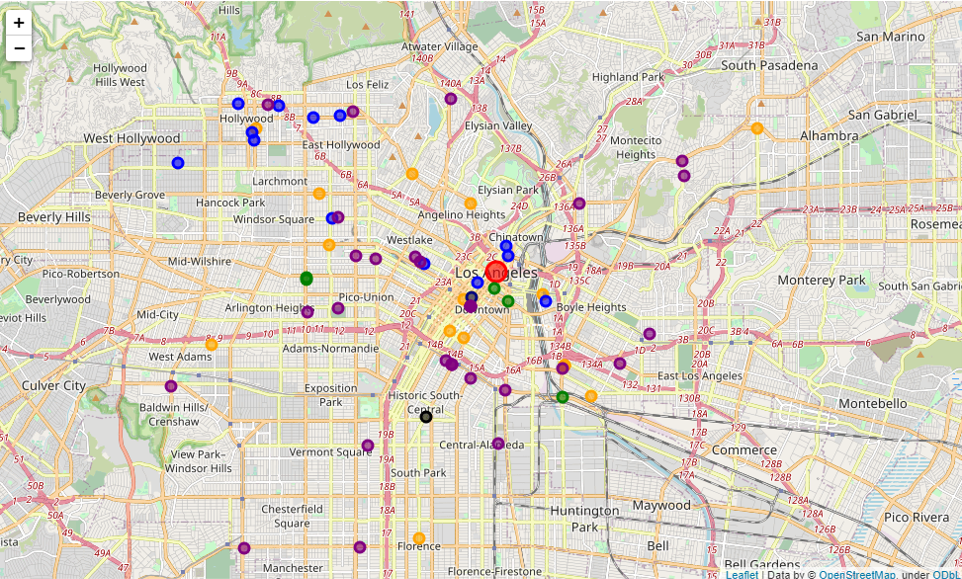

In [143]:
# In case the map is not displyed on Github
Image("LA_map.png")

In [144]:
# Create a dataframe.
numbers = {'Categories': ['American', 'Mexican', 'Italian', 'Korean', 'Thai', 'Japanese', 'Chinese'],
     'Number of Restaurants': [df_LA_american.shape[0], df_LA_mexican.shape[0], df_LA_italian.shape[0], df_LA_korean.shape[0], df_LA_thai.shape[0], df_LA_japanese.shape[0], df_LA_chinese.shape[0]]}
df_LA_stat = pd.DataFrame(data=numbers)
df_LA_stat

,Categories,Number of Restaurants
0,American,1
1,Mexican,19
2,Italian,1
3,Korean,5
4,Thai,13
5,Japanese,7
6,Chinese,33


### The result of the data is partially included above. From here and afterwards, I will compare the statistics between SF and LA area and see which foods are more popular and how far they are from the center of the city.